In [1]:
import webget as wg
import pandas as pd, numpy as np, csv
import matplotlib.pyplot as plt
%matplotlib inline

url = 'http://data.kk.dk/dataset/9070067f-ab57-41cd-913e-bc37bfaf9acd/resource/9fbab4aa-1ee0-4d25-b2b4-b7b63537d2ec/download/befkbhalderkoencivst.csv'
filename = url.split("/")[-1]
data_set = pd.read_csv(filename)
dd = data_set.as_matrix()
#data_set

In [2]:
# 1.
data = "befkbhalderkoencivst.csv"
with open(data) as file:
    reader = csv.reader(file)
    head_row = next(reader)

    distribution_male = {} #------------------TODO
    distribution_female = {}
    distribution_gent = {}
    distribution_lady = {}
    
    gent = 0 # counters
    lady = 0
    male_age_18_30 = 0
    female_age_18_30 = 0
    for row in reader:
        age = int(row[2])
        sex = int(row[4])
        year = int(row[0])

        if age >= 18 and age <= 30:
            if sex == 1: # male
                male_age_18_30 += 1
            if sex == 2: # female
                female_age_18_30 += 1
        if age >= 50:
            if sex == 1:
                gent += 1
            if sex == 2:
                lady += 1

# show the distribution of the following four categories:
print("Females age 18 to 30: " ,female_age_18_30)
print("Males age 18 to 30: " ,male_age_18_30)
print("Females age 50 and over: "  ,lady)
print("Males age 50 and over: " ,gent)


Females age 18 to 30:  10733
Males age 18 to 30:  10173
Females age 50 and over:  49975
Males age 50 and over:  48672


In [3]:
# 2.
# Use matplotlib to plot a bar-char showing how many single males and females 
# of age 18 to 30, are living in BYDEL 1=Indre By, 2=Østerbro and 3=Nørrebro 
# over the time 1992 - 2015

with open(data) as file:
    reader = csv.reader(file)
    head_row = next(reader)
    
    single_men = 0
    single_fem = 0
    for row in reader:
        area = int(row[1])
        status = str(row[3])
        age = int(row[2])
        sex = int(row[4])
        
        if age >= 18 and age <= 30:
            if area == 1:
                if sex == 1:
                    if status == "U":
                        single_men += 1
                
            if area == 1:
                if sex == 2:
                    if status == "U":
                        single_fem += 1
                            
print("total single man in Indre By, age 18 to 30:",single_men)
print("total single females in Indre By, age 18 to 30:",single_fem)

total single man in Indre By, age 18 to 30: 312
total single females in Indre By, age 18 to 30: 312


[(3, 713), (2, 704), (4, 681)]
[(2, 754), (3, 747), (1, 744)]
[(2, 778), (1, 775), (3, 773)]


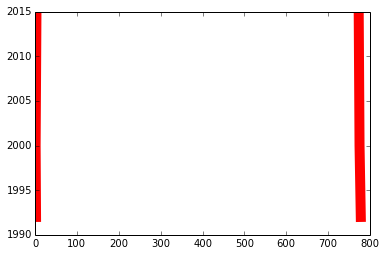

In [119]:
# 3.
# Find the three most populated city parts(BYDEL), in 1992, 2000 and 2015
import operator as op
d = pd.read_csv(filename)
data_set = d.as_matrix()

years = [1992, 2000, 2015]
bydel = {'1': 'Indre By', '2': 'Østerbro', '3': 'Nørrebro', '4': 'Vesterbro/Kgs. Enghave', '5': 'Valby', '6': 'Vanløse', '7': 'Brønshøj-Husum', '8': 'Bispebjerg', '9': 'Amager Øst', '10': 'Amager Vest', '99': 'Udenfor inddeling'}
popultaion_dict = {}
popultaion_arr = []


for y in years:
    year_mask = data_set[:,0] == y
    for d in data_set[year_mask]:
        bydel = d[1]
        if bydel not in popultaion_dict.keys():
            popultaion_dict[bydel] = 1
        else:
            popultaion_dict[bydel] += 1
    popultaion_arr.append(popultaion_dict)
    popultaion_dict = {}

for p in popultaion_arr:
    sorted_p = sorted(p.items(), key=op.itemgetter(1), reverse=True)[:3]
    print(sorted_p)

plt.plot(sorted_p, years, linewidth=10, color='red')
plt.show()

In [ ]:
# 4.
# Create to pie-charts, showing the distribution of marital status' 
# in bydel 1, 2 and 3 in year 2000 and 2015


In [ ]:
# 5.
# Make a histogram of the age distribution in all of the municipality of Copenhangen
